In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv("D:\PROGRAMMING AND SEO\Practise\ML.M\Mall_Customers.csv")
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [4]:
df1.shape

(200, 5)

In [6]:
df1.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


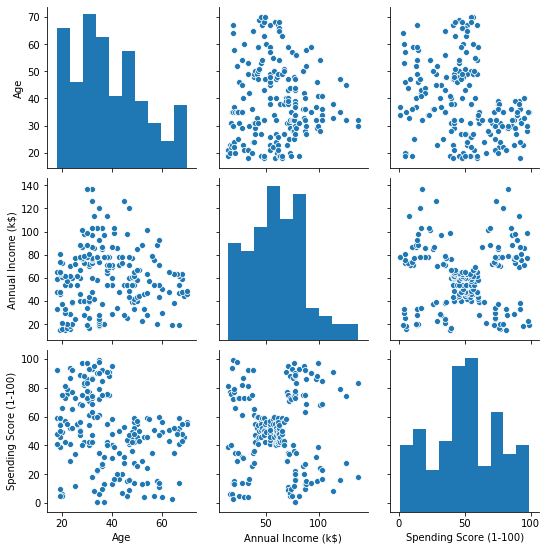

In [8]:
sns.pairplot(df1.drop(columns=['CustomerID'],axis=1))

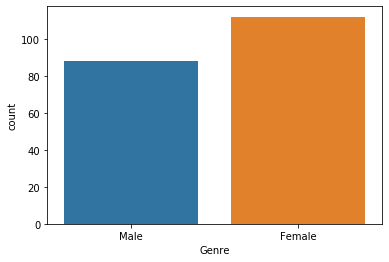

In [9]:
sns.countplot(df1['Genre'])

Text(0.5, 1.0, 'Distribution Of Age')

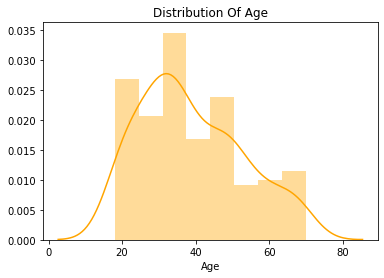

In [12]:
sns.distplot(df1['Age'],color='orange')
plt.title('Distribution Of Age')

Text(0.5, 1.0, 'Distribution Of Income')

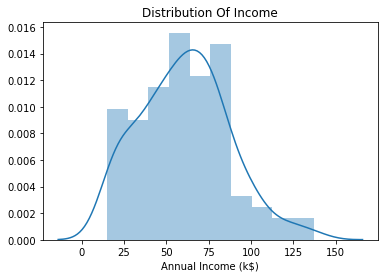

In [13]:
sns.distplot(df1['Annual Income (k$)'])
plt.title('Distribution Of Income')

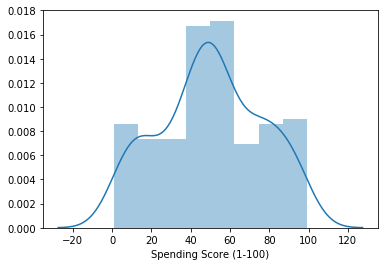

In [14]:
sns.distplot(df1['Spending Score (1-100)'])

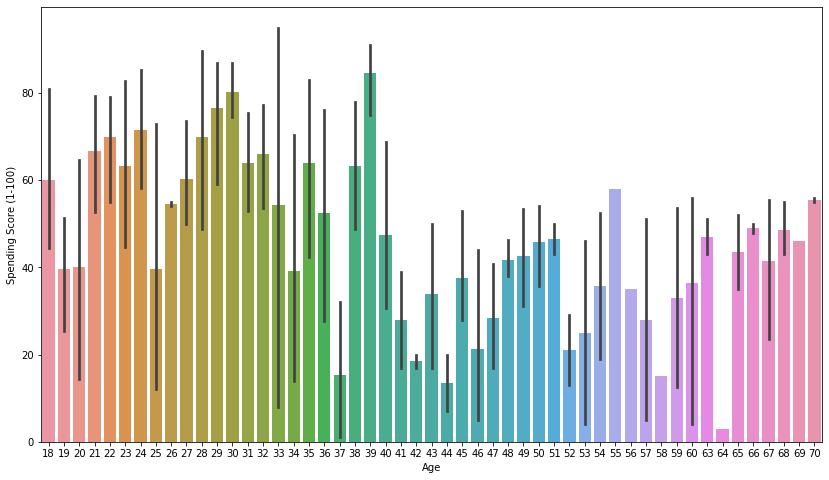

In [15]:
#From the above three distribution plot we concluded the following points
#1.the people within the age range 20 to 50 are visiting the mall frequently
#2.most people have income in between 25k-80k dollars
plt.figure(figsize=(14,8))
sns.barplot(x='Age',y='Spending Score (1-100)',data=df1)

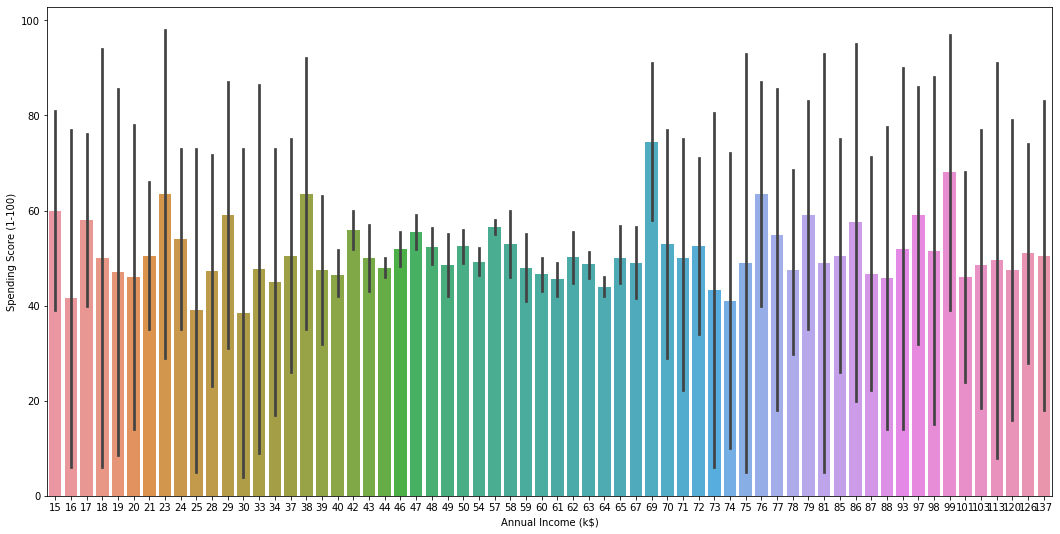

In [16]:
plt.figure(figsize=(18,9))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1)

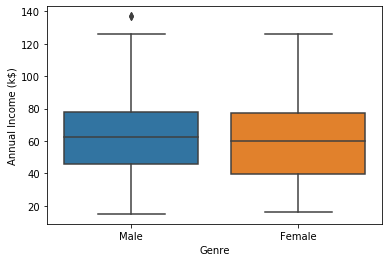

In [24]:
#Again From these two barplots we concluded that the age range 18-40 have high spending scores and spending score is high for high annual income
sns.boxplot(y=df1['Annual Income (k$)'],x=df1['Genre'])



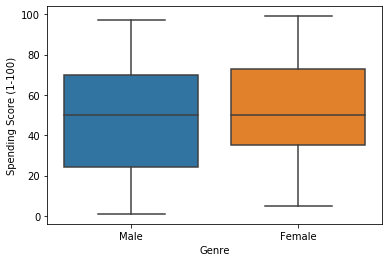

In [25]:
sns.boxplot(y=df1['Spending Score (1-100)'],x=df1['Genre'])


In [26]:
#From these two boxplots we concluded that mean annual income of females are less than that of males but their mean spending score is higher than male
x=df1.iloc[:,[2,3,4]]
x.shape


(200, 3)

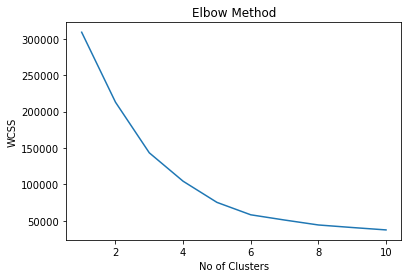

In [27]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300)
    clf.fit(x)
    wcss.append(clf.inertia_)
plt.title('Elbow Method')
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()  

In [28]:
#it can be seen that no of clusters is 5 by elbow method
clf1=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300)
clf1.fit(x)
y_pred=clf1.predict(x)
x['predict1']=y_pred

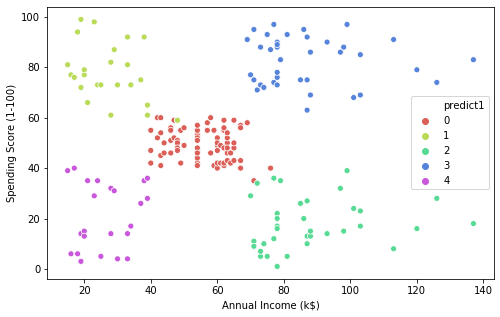

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x['Annual Income (k$)'],x['Spending Score (1-100)'],hue=x['predict1'],palette=sns.color_palette("hls",5))

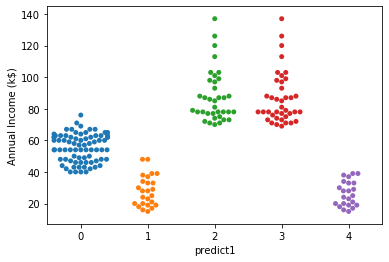

In [38]:
sns.swarmplot(x='predict1',y='Annual Income (k$)',data=x)

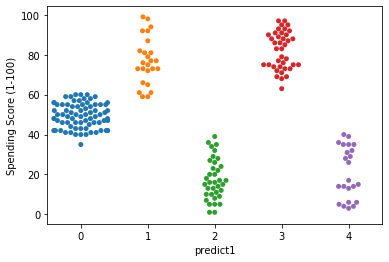

In [39]:
sns.swarmplot(x='predict1',y='Spending Score (1-100)',data=x)

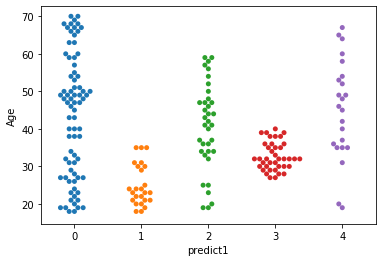

In [40]:
sns.swarmplot(x='predict1',y='Age',data=x)

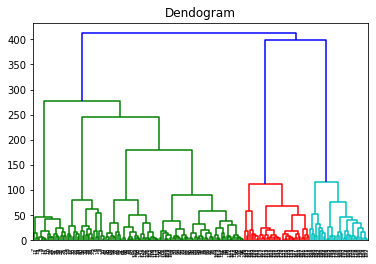

In [41]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(x.drop(columns=['predict1'],axis=1),method='ward'))
plt.title('Dendogram')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
aggg=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
aggg.fit(x.drop(columns=['predict1'],axis=1))
y_pred2=aggg.fit_predict(x.drop(columns=['predict1'],axis=1))
x['predict2']=y_pred2

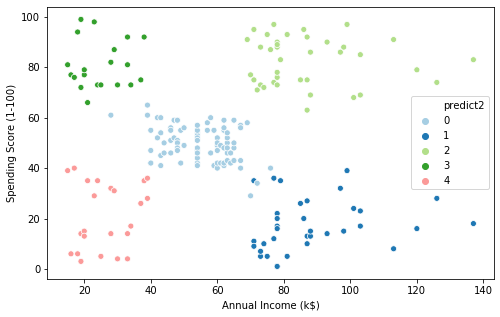

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x['Annual Income (k$)'],x['Spending Score (1-100)'],hue=x['predict2'],palette=sns.color_palette("Paired",5))

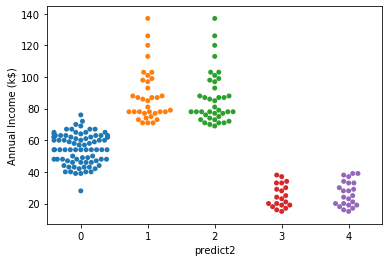

In [44]:
sns.swarmplot(x='predict2',y='Annual Income (k$)',data=x)

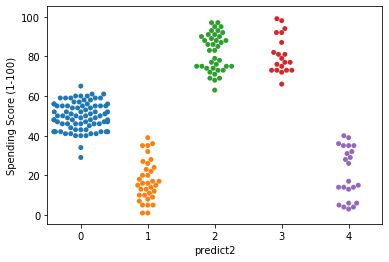

In [45]:
sns.swarmplot(x='predict2',y='Spending Score (1-100)',data=x)

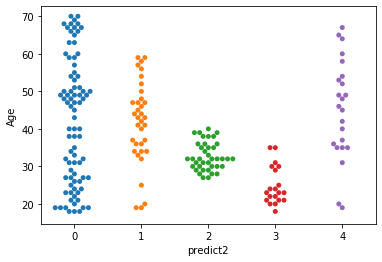

In [46]:
sns.swarmplot(x='predict2',y='Age',data=x)

In [ ]:
#From the two cluster of two algorithms we can conclude that we got 5 groups
#one group of people having low annual income and low spending score
#the second group of people have low annual income but high spending score
#the third group of people having medium range of income and also medium range of spending score
#the fourth group of people having high income but low spending
#and the last group having high income and higgh spending